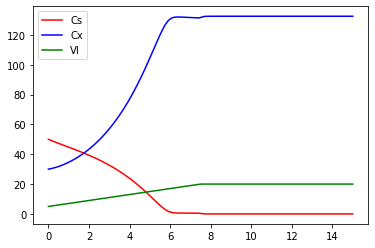

              cs          cx         Vl
0   5.000000e+01   30.000000   5.000000
1   4.914535e+01   30.422303   5.303030
2   4.832220e+01   30.949659   5.606061
3   4.752189e+01   31.576949   5.909091
4   4.673712e+01   32.300795   6.212121
5   4.596129e+01   33.118778   6.515152
6   4.518843e+01   34.029441   6.818182
7   4.441324e+01   35.032284   7.121212
8   4.363107e+01   36.127767   7.424242
9   4.283792e+01   37.317312   7.727273
10  4.203039e+01   38.603101   8.030303
11  4.120474e+01   39.986518   8.333333
12  4.035745e+01   41.471129   8.636364
13  3.948522e+01   43.061213   8.939394
14  3.858475e+01   44.761201   9.242424
15  3.765282e+01   46.575676   9.545455
16  3.668621e+01   48.509371   9.848485
17  3.568177e+01   50.567171  10.151515
18  3.463638e+01   52.754110  10.454545
19  3.354697e+01   55.075374  10.757576
20  3.241048e+01   57.536302  11.060606
21  3.122392e+01   60.142381  11.363636
22  2.998434e+01   62.899252  11.666667
23  2.868882e+01   65.812704  11.969697


In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import pandas as pd


# Enter qsmax in g/g*h
# Enter Ks in g/l
# Enter µmax in 1/h
# Enter entrance substrate concentration
# enter inlet flow in l/h
# enter the end vloume of the reactor

qsmax = 0.2
Ks = 2
mumax = 0.5 # replaced µ by mu - special letters are prone to difficulties :-D
csf = 50
Fin = 2
Vend = 20

# def model (y, t):  # for use with old odeint
def model (t, y):  # for use with new solve_ivp
    
    cs = y[0]
    
    cx = y[1]
    
    Vl = y[2]
    
    qs = qsmax* cs/(cs + Ks)

    mu = mumax*cs/(cs + Ks) 
    
    if Vl <= Vend:
        dVldt = Fin
    else:
        dVldt = 0.0
    
    dcsdt = dVldt/Vl * (csf - cs) - qs*cx
    
    dcxdt = cx*(mu - dVldt/Vl)
    
    return (dcsdt, dcxdt, dVldt)


t = np.linspace(0, 15, 100)

y0 = [50, 30, 5]

#result = odeint(model, y0, t) # old: odeint
result = solve_ivp(model, [np.min(t), np.max(t)], y0, t_eval=t).y.T # new: solve_ivp


cs_t = result[:, 0]
cx_t = result[:, 1]
Vl_t = result[:, 2]


plt.plot(t, cs_t, "r-")
plt.plot(t, cx_t, "b-")
plt.plot(t, Vl_t, "g-")
plt.legend(["Cs", "Cx", "Vl"])
plt.show()


pd.set_option('display.max_rows', 200)
print(pd.DataFrame(result, columns= ("cs", "cx", "Vl")))